In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df16 = pd.read_csv('history_stats_20161108.txt', header=None, sep='\n')
df16 = df16[0].str.split('\t', expand=True)
print(df16.head())

            0               1          2            3         4          5   \
0  county_desc  precinct_abbrv  vtd_abbrv          age  party_cd  race_code   
1     ALAMANCE              01         01  Age 18 - 25       DEM          B   
2     ALAMANCE              01         01  Age 18 - 25       DEM          B   
3     ALAMANCE              01         01  Age 18 - 25       DEM          B   
4     ALAMANCE              01         01  Age 18 - 25       DEM          B   

            6         7             8              9           10  \
0  ethnic_code  sex_code  total_voters  election_date  stats_type   
1           NL         F             2     11/08/2016     history   
2           NL         M             2     11/08/2016     history   
3           UN         F             1     11/08/2016     history   
4           UN         M             1     11/08/2016     history   

            11             12                  13              14  
0  update_date  voting_method  voting_meth

In [3]:
df16.columns = df16.iloc[0]
df16 = df16.replace(r'^\s*$', np.nan, regex=True)
df_16 = df16.drop([0])

# took out descripitons that were either irrelevant or repetitive
df_16 = df_16.drop(["vtd_abbrv", "voting_method", "stats_type", "update_date"], axis = 1)
df_16["total_voters"] = pd.to_numeric(df_16["total_voters"])

#filtered for 11/8/16 election date just in case and then removed
df_16 = df_16[df_16["election_date"] == "11/08/2016"]
df_16 = df_16.drop(["election_date"], axis = 1)
print(df_16.head())

0 county_desc precinct_abbrv          age party_cd race_code ethnic_code  \
1    ALAMANCE             01  Age 18 - 25      DEM         B          NL   
2    ALAMANCE             01  Age 18 - 25      DEM         B          NL   
3    ALAMANCE             01  Age 18 - 25      DEM         B          UN   
4    ALAMANCE             01  Age 18 - 25      DEM         B          UN   
5    ALAMANCE             01  Age 18 - 25      DEM         O          HL   

0 sex_code  total_voters voting_method_desc voted_party_cd  
1        F           2.0   ABSENTEE ONESTOP            DEM  
2        M           2.0          IN-PERSON            DEM  
3        F           1.0   ABSENTEE ONESTOP            DEM  
4        M           1.0   ABSENTEE ONESTOP            DEM  
5        F           1.0   ABSENTEE ONESTOP            DEM  


In [4]:
#edited ages

df_16 = df_16.replace('Age 18 - 25', '18-25')
df_16 = df_16.replace('Age 26 - 40', '26-40')
df_16 = df_16.replace('Age 41 - 65', '41-65')
df_16 = df_16.replace('Age Over 66', '66+')
df_16 = df_16[df_16["age"] != "Age < 18 Or Invalid Birth Dates"]
print(df_16.head())

0 county_desc precinct_abbrv    age party_cd race_code ethnic_code sex_code  \
1    ALAMANCE             01  18-25      DEM         B          NL        F   
2    ALAMANCE             01  18-25      DEM         B          NL        M   
3    ALAMANCE             01  18-25      DEM         B          UN        F   
4    ALAMANCE             01  18-25      DEM         B          UN        M   
5    ALAMANCE             01  18-25      DEM         O          HL        F   

0  total_voters voting_method_desc voted_party_cd  
1           2.0   ABSENTEE ONESTOP            DEM  
2           2.0          IN-PERSON            DEM  
3           1.0   ABSENTEE ONESTOP            DEM  
4           1.0   ABSENTEE ONESTOP            DEM  
5           1.0   ABSENTEE ONESTOP            DEM  


In [11]:
#Pivot Table of Votes Total by Party and Gender
gender_16 = df_16[df_16["sex_code"] != "N"]
gender_16 = gender_16.pivot_table('total_voters', index='sex_code', columns = 'voted_party_cd', aggfunc='sum')
gender_16.head()

voted_party_cd,DEM,LIB,REP,UNA
sex_code,,,,
F,1101770.0,6898.0,765755.0,619988.0
M,685707.0,9775.0,722915.0,568120.0
U,26233.0,433.0,17436.0,47320.0


In [12]:
#Pivot Table of Votes Total by Party and Age
age_16 = df_16.pivot_table('total_voters', index='age', columns = 'voted_party_cd', aggfunc='sum')
age_16.head()

voted_party_cd,DEM,LIB,REP,UNA
age,,,,
18-25,150141.0,4021.0,117555.0,165996.0
26-40,352284.0,7199.0,267515.0,328140.0
41-65,854198.0,5160.0,758909.0,531432.0
66+,457089.0,726.0,362128.0,209865.0


In [13]:
#Pivot Table of Votes Total by Party and Race

race_16 = df_16.pivot_table('total_voters', index='race_code', columns = 'voted_party_cd', aggfunc='sum')
race_16.head()

voted_party_cd,DEM,LIB,REP,UNA
race_code,,,,
A,15993.0,231.0,7356.0,23382.0
B,823994.0,1198.0,16664.0,118638.0
I,16811.0,93.0,5016.0,6744.0
M,12126.0,309.0,3204.0,9881.0
O,36570.0,625.0,14486.0,32874.0


<AxesSubplot:xlabel='sex_code'>

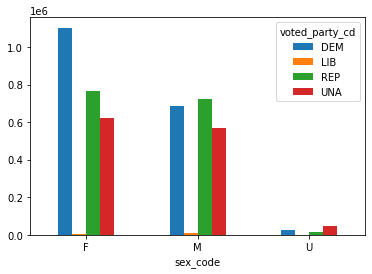

In [17]:
gender_16.plot.bar(rot = 0)

<AxesSubplot:ylabel='age'>

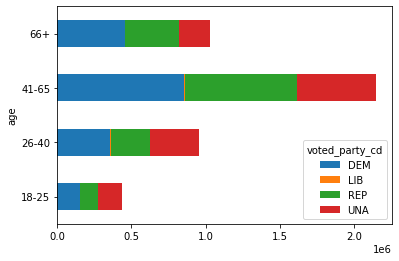

In [19]:
age_16.plot.barh(stacked=True)

<AxesSubplot:xlabel='race_code'>

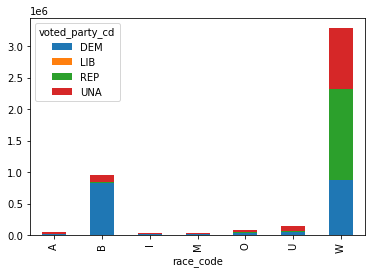

In [22]:
race_16.plot.bar(stacked=True)